# 16-6. 프로젝트 - Movielens 영화 SBR

In [1]:
import datetime as dt
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,UserId,ItemId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


- Time 항목에는 UTC time 가 포함되어, 1970년 1월 1일부터 경과된 초 단위 시간이 기재되어 있습니다.

In [3]:
#UTC time 바꿔주기
import datetime as dt

data["Time"] = data["Time"].apply(lambda x: dt.datetime.fromtimestamp(x, dt.timezone.utc))
data.head()

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19+00:00
22,1,1270,5,2000-12-31 22:00:55+00:00
27,1,1721,4,2000-12-31 22:00:55+00:00
37,1,1022,5,2000-12-31 22:00:55+00:00
24,1,2340,3,2000-12-31 22:01:43+00:00


In [4]:
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

- 유저수 : 6040
- 영화수 : 3706

In [5]:
user_ratings_length = data.groupby('UserId').size()
user_ratings_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

- user_ratings_length : user가 얼마나 영화에 평점을 매겼는가

In [6]:
print('median = {}, mean = {} \nmin={}, max={}\nquantile={}' .format(user_ratings_length.median(), user_ratings_length.mean(),
                                                                     user_ratings_length.min(), user_ratings_length.max(),user_ratings_length.quantile(0.999)))

median = 96.0, mean = 165.5975165562914 
min=20, max=2314
quantile=1343.181000000005


- 평균이 165에 99%는 1343보다 낮다. 
- max값인 2314가 이상하다고 느껴 확인해보겠다.

In [7]:
long_session = user_ratings_length[user_ratings_length==2314].index[0]
print(long_session)
data[data['UserId']==long_session].head(60)

4169


,UserId,ItemId,Rating,Time
696969,4169,1268,5,2000-08-03 20:09:52+00:00
697168,4169,2617,4,2000-08-03 20:09:52+00:00
697185,4169,2628,4,2000-08-03 20:09:52+00:00
697219,4169,2653,4,2000-08-03 20:09:52+00:00
697275,4169,423,3,2000-08-03 20:09:52+00:00
696168,4169,3801,5,2000-08-03 20:11:21+00:00
696250,4169,3841,2,2000-08-03 20:11:21+00:00
697903,4169,3761,3,2000-08-03 20:11:21+00:00
697954,4169,3788,3,2000-08-03 20:11:21+00:00
695653,4169,3794,4,2000-08-03 20:11:59+00:00


- 같은날에 너무 많은 영화의 평점을 매기는 것 같다.
- 매크로거나 알바일  가능성이 높다고 생각(이상치)

In [8]:
idx_del_id = data[data['UserId'] ==4169].index
data_2 = data.drop(idx_del_id)
data_2

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19+00:00
22,1,1270,5,2000-12-31 22:00:55+00:00
27,1,1721,4,2000-12-31 22:00:55+00:00
37,1,1022,5,2000-12-31 22:00:55+00:00
24,1,2340,3,2000-12-31 22:01:43+00:00
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29+00:00
999988,6040,1921,4,2001-08-10 14:41:04+00:00
1000172,6040,1784,3,2001-08-10 14:41:04+00:00
1000167,6040,161,3,2001-08-10 14:41:26+00:00


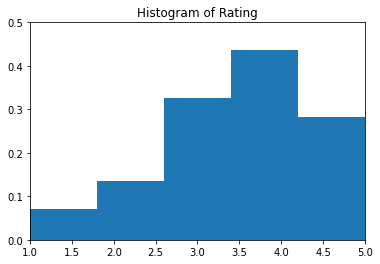

In [9]:
plt.hist(data_2['Rating'], density=True,bins=5)
plt.title('Histogram of Rating')
plt.axis([1, 5, 0, 0.5])
plt.show()

- 목표는 SBR 즉 세션을 통해 클릭을 했을때 다른 영화를 추천해주는 시스템이다.
- 연관성 있는 영화의 평점이 낮으면 의미가 없다고 판단. 또한 3점 밑인 데이터는 적기 때문에 3점 이상인 데이터만 가지고가겠다.
>SAMPLING ON THE OUTPUT : Negative Sampling와 같은 개념입니다. Item의 수가 많기 때문에 Loss를 계산할 때 모든 아이템을 비교하지 않고 인기도를 고려하여 Sampling합니다. << 이걸 보다가 생각나서 전처리해주었다.

In [10]:
data_3 = data_2[data_2['Rating']>=3]
data_3

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19+00:00
22,1,1270,5,2000-12-31 22:00:55+00:00
27,1,1721,4,2000-12-31 22:00:55+00:00
37,1,1022,5,2000-12-31 22:00:55+00:00
24,1,2340,3,2000-12-31 22:01:43+00:00
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29+00:00
999988,6040,1921,4,2001-08-10 14:41:04+00:00
1000172,6040,1784,3,2001-08-10 14:41:04+00:00
1000167,6040,161,3,2001-08-10 14:41:26+00:00


행의 길이는  1000209 -> 834510 

###  UserID -> session ID 

- UserID를 통해 세션을 구하기 위해서는 Time을 이용해야 한다.
- UserID를 그룹으로 묶고, 그다음 3일 정도를 같은 세션으로 묶어보겠다. 
    - UserID를 통해 User 자체를 하나의 세션으로 만들자고 생각하니 세션이 너무 길어질거 같아 위와같이 판단
    - 하루를 하면 세션의 길이가 1인 것이 나올 수 있다고 판단하여 3일 정도로 지정
- data_3은 매크로로 보이는 이상치와 점수 3점을 제외한 데이터이다.
- data_3의 3개월 동안의 데이터,  6개월 동안의 데이터를 나눠서 진행해보겠다.

In [11]:
oldest, latest = data_3['Time'].min(), data_3['Time'].max()
print(oldest) 
print(latest)

2000-04-25 23:05:32+00:00
2003-02-28 17:49:50+00:00


- 약 2년 10개월 정도의 데이터가 있다.
- data_3m = 3개월 데이터 , data_6m = 6개월 데이터

In [12]:
# 원하는 기간의(month) 데이터를 분리해주는 함수
def get_data_before_month(data, month):
    latest = data['Time'].max()
    month_ago = latest - dt.timedelta(month*30)
    data = data[data['Time'] > month_ago]   # 방금 구한 날짜 이후의 데이터만 모은다. 
    print(f'length:{len(data)}')
    oldest, latest = data['Time'].min(), data['Time'].max()
    print(f'oldest: {oldest}') 
    print(f'latest: {latest}')
    return data

In [13]:
data_3m = get_data_before_month(data_3, 3)

length:3753
oldest: 2002-11-30 20:24:52+00:00
latest: 2003-02-28 17:49:50+00:00


In [14]:
data_6m = get_data_before_month(data_3,6)

length:7303
oldest: 2002-09-01 19:41:39+00:00
latest: 2003-02-28 17:49:50+00:00


In [15]:
data_3m['Time'] = pd.to_datetime(data_3m.Time).dt.tz_localize(None)
data_6m['Time'] = pd.to_datetime(data_6m.Time).dt.tz_localize(None)

- Invalid comparison between dtype=datetime64[ns, UTC] and datetime
- ns,UTC dateTime64와 datetime의 비교가 불가능해서 처리해줬다.

In [16]:
from datetime import datetime, timedelta

start = "2002-11-30" 
last = "2003-02-28" # 시작일, 종료일 datetime 으로 변환 
start_date = datetime.strptime(start, "%Y-%m-%d") 
last_date = datetime.strptime(last, "%Y-%m-%d") # 종료일 까지 반복 
dflist_3m = []
while start_date <= last_date: 
    dates = start_date
    tmp = data_3m[(data_3m["Time"]>=dates) & (data_3m["Time"]<dates+timedelta(days=4))]
    dflist_3m.append(tmp) 
    start_date += timedelta(days=3)  #3일씩


In [17]:
start = "2002-09-01" 
last = "2003-02-28" # 시작일, 종료일 datetime 으로 변환 
start_date = datetime.strptime(start, "%Y-%m-%d") 
last_date = datetime.strptime(last, "%Y-%m-%d") # 종료일 까지 반복 
dflist_6m = []
while start_date <= last_date: 
    dates = start_date
    tmp = data_6m[(data_6m["Time"]>=dates) & (data_6m["Time"]<dates+timedelta(days=4))]
    dflist_6m.append(tmp) 
    start_date += timedelta(days=3)  #3일씩

In [18]:
tmp_3m = []
for data in dflist_3m : 
    df = data.groupby(['UserId'])['ItemId'].count().reset_index()
    df.reset_index(inplace=True)
    tmp_3m.append(df)

In [19]:
# SessionId 컬럼 추가
final_3m = []
for data, tmp, num in zip(dflist_3m,tmp_3m,range(len(dflist_3m))) : 
    data = pd.merge(data, tmp, on=['UserId'])
    data.drop(columns='ItemId_y', inplace=True)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time', 'Divison']
    final_3m.append(data)


In [40]:
tmp = 0
session_list=[]
for i,data in enumerate(final_3m) :
    for j in range(len(data)):
        if tmp != data["Divison"][j]:
            tmp+=1
        session_list.append(tmp)

df_session= pd.DataFrame(session_list, columns = ['Session_id'])    

In [41]:
final_3m_merge = final_3m[0]
for data in final_3m[1:] :
    final_3m_merge =pd.concat([final_3m_merge,data] ,axis=0)

final_3m_merge= final_3m_merge.reset_index()

In [42]:
final_3m_merge= pd.concat([final_3m_merge,df_session],axis=1)
final_3m_merge

,index,UserId,ItemId,Rating,Time,Divison,Session_id
0,0,195,3504,5,2002-12-02 07:09:56,0,0
1,1,343,1584,3,2002-12-01 20:21:39,1,1
2,2,424,2599,4,2002-12-02 18:59:09,2,2
3,3,424,2841,4,2002-12-02 19:00:18,2,2
4,4,424,3788,5,2002-12-02 19:03:06,2,2
...,...,...,...,...,...,...,...
4991,5,4958,2634,3,2003-02-28 17:49:08,1,4812
4992,6,4958,1924,4,2003-02-28 17:49:50,1,4813
4993,7,5312,3267,4,2003-02-28 15:05:11,2,4814
4994,8,5948,1180,5,2003-02-28 13:11:19,3,4815


In [43]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['UserId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [44]:

print(f'before:{len(final_3m_merge)}')
data_3m= cleanse_recursive(final_3m_merge, shortest=2, least_click=5)
print(f'after:{len(data_3m)}')


before:4996
after:2469


In [45]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()    
    session_in_train = data.loc[data['Time'] < final_time - dt.timedelta(n_days)]
    session_in_test = data.loc[data['Time'] >= final_time - dt.timedelta(n_days)]
    return session_in_train, session_in_test

In [46]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Session Id: {data["Session_id"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min().strftime("%Y-%m-%d %H:%M:%S.%f")}\n'
          f'\t Last Time : {data["Time"].max().strftime("%Y-%m-%d %H:%M:%S.%f")}\n')

In [47]:
tr, test = split_by_date(data_3m, n_days=10)
tr

,index,UserId,ItemId,Rating,Time,Divison,Session_id
2,2,424,2599,4,2002-12-02 18:59:09,2,2
7,7,696,2959,5,2002-12-01 18:04:52,4,4
8,8,696,899,5,2002-12-01 18:06:13,4,4
11,11,911,1233,4,2002-12-02 23:13:25,6,6
13,13,911,3503,4,2002-12-03 00:09:08,6,6
...,...,...,...,...,...,...,...
4367,80,5484,924,5,2003-02-17 00:07:30,23,4188
4369,82,5484,2916,4,2003-02-17 00:08:17,23,4190
4371,84,5484,3793,5,2003-02-17 00:08:38,23,4192
4375,88,5484,3578,4,2003-02-17 00:14:20,23,4196


In [48]:
# 현재 3개월 데이터에 대해서 테스트하고 있다.
tr, test = split_by_date(data_3m, n_days=10)
tr, val = split_by_date(tr, n_days=10)
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 1963
	 Session Id: 1864
	 Items: 334
	 First Time : 2002-12-01 04:17:00.000000
	 Last Time : 2003-02-08 15:14:46.000000

* valid Set Stats Info
	 Events: 240
	 Session Id: 240
	 Items: 125
	 First Time : 2003-02-08 22:46:24.000000
	 Last Time : 2003-02-18 17:36:46.000000

* test Set Stats Info
	 Events: 266
	 Session Id: 266
	 Items: 151
	 First Time : 2003-02-18 19:10:24.000000
	 Last Time : 2003-02-28 17:45:20.000000



In [49]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
def indexing(df):
    id2idx = {item_id : index for index, item_id in enumerate(df['ItemId'].unique())}
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr)
val = indexing(val)
test = indexing(test)

In [50]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train_3month.pkl')
val.to_pickle(save_path / 'valid_3month.pkl')
test.to_pickle(save_path / 'test_3month.pkl')

##3. Data Pipeline
SessionDataset

In [51]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

In [52]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,index,UserId,ItemId,Rating,Time,Divison,Session_id,item_idx
2,2,424,2599,4,2002-12-02 18:59:09,2,2,0
7,7,696,2959,5,2002-12-01 18:04:52,4,4,1
8,8,696,899,5,2002-12-01 18:06:13,4,4,2
11,11,911,1233,4,2002-12-02 23:13:25,6,6,3
13,13,911,3503,4,2002-12-03 00:09:08,6,6,4
14,14,911,539,4,2002-12-03 01:02:37,6,6,5
16,16,911,1641,4,2002-12-03 01:07:13,6,6,6
17,17,911,3685,4,2002-12-03 01:07:53,6,6,7
20,20,911,1923,4,2002-12-03 01:11:25,6,6,8
24,24,911,1343,3,2002-12-03 01:15:37,6,6,9


In [53]:
tr_dataset.df

,index,UserId,ItemId,Rating,Time,Divison,Session_id,item_idx
2,2,424,2599,4,2002-12-02 18:59:09,2,2,0
7,7,696,2959,5,2002-12-01 18:04:52,4,4,1
8,8,696,899,5,2002-12-01 18:06:13,4,4,2
11,11,911,1233,4,2002-12-02 23:13:25,6,6,3
13,13,911,3503,4,2002-12-03 00:09:08,6,6,4
...,...,...,...,...,...,...,...,...
4007,142,4958,2108,3,2003-02-07 21:48:44,15,3828,295
4010,145,4958,2115,4,2003-02-07 21:51:36,15,3831,310
4011,146,4958,1641,3,2003-02-07 22:01:14,15,3832,6
4012,147,4958,3591,3,2003-02-07 22:02:18,15,3833,16


In [54]:
tr_dataset.session_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153])

In [46]:
tr_dataset.get_click_offsets()

array([  0,   5,  37,  63,  67,  93,  94, 123, 125, 127, 129, 131, 135,
       143, 145, 218, 221, 225, 234, 237, 243, 245, 248, 250, 254, 256,
       264, 273, 275, 279, 281, 283, 289, 293, 300, 302, 319, 322, 337,
       339, 341, 344, 346, 350, 354, 356, 359, 369, 377, 380, 390, 394,
       411, 415, 417, 442, 448, 452, 453, 461, 473, 481, 493, 498, 501,
       508, 510, 512, 514, 520, 547, 548, 550, 560, 564, 568, 573, 576,
       583, 592, 595, 600, 610, 612, 617, 620, 625, 628, 630, 632, 635,
       681, 684, 689, 693, 697, 705, 711, 719, 743, 746, 748, 751, 756,
       759, 839, 852, 864, 870, 875, 879, 883, 899, 903, 907, 912, 928,
       961, 963], dtype=int32)

In [55]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [56]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)

In [57]:
iter_ex = iter(tr_data_loader)

In [58]:
for i in range(5):
    inputs, labels, mask =  next(iter_ex)
    print(f'Model Input Item Idx are : {inputs}')
    print(f'Label Item Idx are : {"":5} {labels}')
    print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0  8 47 89]
Label Item Idx are :       [ 1  9 48 90]
Previous Masked Input Idx are []
Model Input Item Idx are : [ 1  9 48 90]
Label Item Idx are :       [ 2 10 49 91]
Previous Masked Input Idx are []
Model Input Item Idx are : [ 2 10 49 91]
Label Item Idx are :       [ 3 11 50 92]
Previous Masked Input Idx are []
Model Input Item Idx are : [ 3 11 50 92]
Label Item Idx are :       [ 4 12 51 93]
Previous Masked Input Idx are []
Model Input Item Idx are : [ 4 12 51 93]
Label Item Idx are :       [ 5 13 52 94]
Previous Masked Input Idx are []


In [59]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [61]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [62]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=8, hsz=50, drop_rate=0.2, lr=0.001, epochs=20, k=10)

In [63]:
model = create_model(args)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(8, 1, 334)]             0         
_________________________________________________________________
GRU (GRU)                    [(8, 50), (8, 50)]        57900     
_________________________________________________________________
dropout (Dropout)            (8, 50)                   0         
_________________________________________________________________
dense (Dense)                (8, 334)                  17034     
Total params: 74,934
Trainable params: 74,934
Non-trainable params: 0
_________________________________________________________________


In [64]:
def train_model(model, args, display_flg=True):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['UserId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask) 

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k, display_flg) 

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")
    
    return val_recall, val_mrr


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU') 
    hidden_states = gru_layer.states[0].numpy()
    for elt in mask: 
        hidden_states[elt, :] = 0  
    gru_layer.reset_states(states=hidden_states)


    
def get_metrics(data, model, args, k: int, display_flg=True): 
                                            
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  
        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])

        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])
    
        
    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [65]:
train_model(model, args)

Evaluation:  15%|█▌        | 4/26 [00:00<00:02,  8.97it/s]


	 - Recall@10 epoch 1: 0.187500
	 - MRR@10    epoch 1: 0.089063



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 19.70it/s]


	 - Recall@10 epoch 2: 0.125000
	 - MRR@10    epoch 2: 0.048177



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 19.61it/s]


	 - Recall@10 epoch 3: 0.125000
	 - MRR@10    epoch 3: 0.041667



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 20.76it/s]


	 - Recall@10 epoch 4: 0.156250
	 - MRR@10    epoch 4: 0.082031



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 19.85it/s]


	 - Recall@10 epoch 5: 0.250000
	 - MRR@10    epoch 5: 0.153646



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.53it/s]


	 - Recall@10 epoch 6: 0.531250
	 - MRR@10    epoch 6: 0.304588



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.75it/s]


	 - Recall@10 epoch 7: 0.531250
	 - MRR@10    epoch 7: 0.361979



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.40it/s]


	 - Recall@10 epoch 8: 0.500000
	 - MRR@10    epoch 8: 0.331250



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.07it/s]


	 - Recall@10 epoch 9: 0.531250
	 - MRR@10    epoch 9: 0.321999



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.40it/s]


	 - Recall@10 epoch 10: 0.593750
	 - MRR@10    epoch 10: 0.338058



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.57it/s]


	 - Recall@10 epoch 11: 0.562500
	 - MRR@10    epoch 11: 0.319432



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.22it/s]


	 - Recall@10 epoch 12: 0.531250
	 - MRR@10    epoch 12: 0.303249



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 20.65it/s]


	 - Recall@10 epoch 13: 0.500000
	 - MRR@10    epoch 13: 0.309152



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.20it/s]


	 - Recall@10 epoch 14: 0.500000
	 - MRR@10    epoch 14: 0.310193



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.33it/s]


	 - Recall@10 epoch 15: 0.500000
	 - MRR@10    epoch 15: 0.316964



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 21.10it/s]


	 - Recall@10 epoch 16: 0.500000
	 - MRR@10    epoch 16: 0.324777



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.63it/s]


	 - Recall@10 epoch 17: 0.531250
	 - MRR@10    epoch 17: 0.332589



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.41it/s]


	 - Recall@10 epoch 18: 0.562500
	 - MRR@10    epoch 18: 0.346875



Evaluation:  15%|█▌        | 4/26 [00:00<00:00, 22.63it/s]


	 - Recall@10 epoch 19: 0.593750
	 - MRR@10    epoch 19: 0.361545



Evaluation:  15%|█▌        | 4/26 [00:00<00:01, 12.10it/s]

	 - Recall@10 epoch 20: 0.593750
	 - MRR@10    epoch 20: 0.335615



(0.59375, 0.3356150793650794)

# 회고 

> 코로나 이슈로 몸져누웠다가 부랴부랴 하느라 하고픈 걸 다 못해서 아쉬웠다.  
랭킹을 이용하여 인기가 어느정도 있는 것만 잘라냈다.  
세션은 3일정도의 기간을 나누고 userid가 같은 것 끼리 모아 정의한것  
같은 사람의 세션을 기간을 좀 길게둬서 세션으로 만들고 싶었다. 그냥 userid로 했으면 세션자체가 엄청 길어질거같아서  
세션은 3개월치만  했는데 학습 결과가 제대로 안나온것 같다.  

